In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')

X = df.drop(' price' , axis = 1)
y =  df[' price']
m = len(y)

In [3]:
#Feature Scaling

def feature_scale(X):
    mean = np.mean(X , axis = 0)
    std = np.std(X , axis = 0)
    df_norm = (X - mean) / std
    return df_norm , mean ,  std


In [4]:
#we should use hstack() from numpy to add a column and vstack() to add the row

X, mu, sigma = feature_scale(X)

X = np.hstack((np.ones((len(y),1)), X))

In [5]:
def compute_cost(X, y , theta):
    predection = X.dot(theta)
    error = np.subtract(predection  , y)
    sq_err = np.square(error)
    cost = 1/2*(np.sum(sq_err))
    return  cost

In [6]:
def gradient_descent(X, y , theta , alpha , iteration):
    
    cost_history = np.zeros(iteration)

    for i in range(iteration):
        predictions = X.dot(theta)
        errors = np.subtract(predictions , y)
        correction = (alpha/len(y)) * X.T.dot(errors) 
        theta = theta - correction
        cost_history[i] = compute_cost(X, y , theta) 
    return theta, cost_history

In [7]:
theta = np.zeros(X.shape[1])
iteration = 500

alpha = 0.01
theta , cost = gradient_descent(X  , y, theta , alpha , iteration)

Text(0.5, 1.0, 'Convergence of gradient descent')

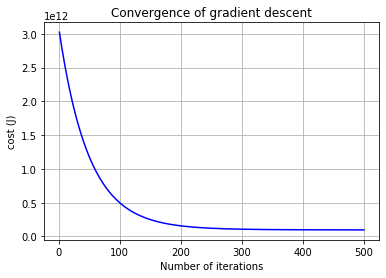

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, iteration +1), cost, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")


In [9]:
alpha1 = 0.001
theta1 , cost1 = gradient_descent(X  , y, theta , alpha1 , iteration)

alpha2 = 0.01
theta2 , cost2 = gradient_descent(X  , y, theta , alpha2 , iteration)

alpha3 = 0.15
theta , cost3 = gradient_descent(X  , y, theta , alpha3 , iteration)

alpha4 = 0.2
theta , cost4 = gradient_descent(X  , y, theta , alpha4 , iteration)

alpha5 = 0.3
theta , cost5 = gradient_descent(X  , y, theta , alpha5 , iteration)

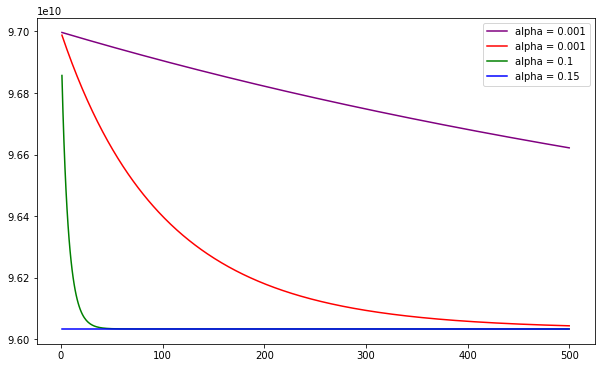

In [10]:
plt.plot(range(1, iteration +1), cost1, color ='purple', label = 'alpha = 0.001')
plt.plot(range(1, iteration +1), cost2, color ='red', label = 'alpha = 0.001')
plt.plot(range(1, iteration +1), cost3, color ='green', label = 'alpha = 0.1')
plt.plot(range(1, iteration +1), cost4, color ='blue', label = 'alpha = 0.15')

plt.legend()